## Tema 1 -  1er Parcial Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Junio 2024.

### Modelo numérico del Teorema de Stockes 

El teorema de Stockes nos relaciona la integral de línea de un campo vectorial sobre la frontera de una superficie, con el flujo (o integral rotacional) a traves de esta.<br>
$ \oint \vec{F} \ d\vec{r} = \iint \vec{\nabla}\times \vec{F} \ \hat{n} \ dA $<br><br>
Se pide obtener numéricamente con los métodos utilizados a lo largo del año, el valor, y de ser posible, una visualizacion del flujo que atravieza una superficie compuesta por media esfera con $z > 0$ para un campo $\vec{F} = (y,-x,z)$<br><br>


Lo primero que deberíamos hacer para modelarlo es calcular el rotor del campo<br>
Recordando que el operador nabla es un vector conformado por las derivadas parciales de las tres coordenadas<br>
$\nabla = (\hat{i}\frac{d}{dx},\hat{j}\frac{d}{dy},\hat{k}\frac{d}{dz})$<br><br>
Entonces el rotor se puede resolver numéricamente como el determinante<br>
$
\vec{\nabla}\times \vec{F} = \begin{vmatrix}
     \hat{i} & \hat{j} & \hat{k}\\ 
     \frac{d}{dx} & \frac{d}{dy} & \frac{d}{dz}\\
     F_{x} & F_{y} & F_{z} 
\end{vmatrix} = (\frac{dF_{z}}{dy} - \frac{dF_{y}}{dz} )\hat{i} + (\frac{dF_{x}}{dz} - \frac{dF_{z}}{dx} )\hat{j} + (\frac{dF_{y}}{dx} - \frac{dF_{x}}{dy} )\hat{k}
$
<br><br>
Se animan a crear el algoritmo?<br>
Con MonteCarlo lo que podemos hacer es resolver el flujo para cada $dA$ , y el área que deberían sumar todos mis $dA$ corresponde a la superficie media esfera<br>
$dA = \frac{\pi \ R^{2}}{2 \ N}$<br>
Donde N vá a ser la cantidad de puntos.<br>
Acumule los pequeños pequeños flujitos calculados para obtener el flujo neto del rotor a travez de la superficie. <br>
Qué conclusión puede sacar al respecto?<br>


-3.693943399172706e-15


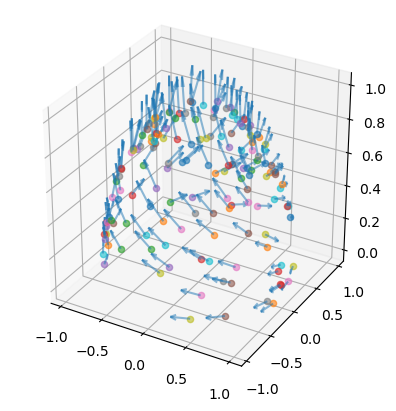

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = 150 #cantidad de iteraciones
R = 1 #radio de la esfera
dr = 0.001 #espesor cascara
dA = (0.5*math.pi*R**2)/N

def F(r):
   return np.array([r[1],-r[0],r[2]]) # F = (y,-x,z)

def n(r): #vector unitario n
    return r / np.linalg.norm(r)

def rotor(campo): #hacemos cada derivada por el metodo de diferencias centrales
    x,y,z = campo
    h = 0.001
    dfxdy = ( n(np.array([x,y+h,z]))[0] - n(np.array([x,y-h,z]))[0] ) / (2*h)
    dfxdz = ( n(np.array([x,y,z+h]))[0] - n(np.array([x,y,z-h]))[0] ) / (2*h)
    dfydx = ( n(np.array([x+h,y,z]))[1] - n(np.array([x-h,y,z]))[1] ) / (2*h)
    dfydz = ( n(np.array([x,y,z+h]))[1] - n(np.array([x,y,z-h]))[1] ) / (2*h)
    dfzdx = ( n(np.array([x+h,y,z]))[2] - n(np.array([x-h,y,z]))[2] ) / (2*h)
    dfzdy = ( n(np.array([x,y+h,z]))[2] - n(np.array([x,y-h,z]))[2] ) / (2*h)
    return np.array([ dfzdy-dfydz, dfxdz-dfzdx, dfydx-dfxdy ])


i = 0 
fig = plt.figure()
ax = fig.add_subplot( aspect = 'equal',projection='3d')
flujo =0

while i < N:
    # para la posicion de 'dA' tengo que generar dos numeros random entre -1 y 1 para mis coordenadas x, y,z.
    rx = (2 * np.random.random() -1)
    ry = (2 * np.random.random() -1)
    rz = (2 * np.random.random() -1)
    rt = R * np.array([rx,ry,rz])
    u=ry
    v=-rx
    w=rz
    if np.linalg.norm(rt) > R - dr and np.linalg.norm(rt)< R + dr and rt[2]>0:  # si el punto random esta en la superficie, le calculo el flujo a traves 
      ax.scatter(rt[0],rt[1],rt[2], alpha=0.6)  
      dflujo = np.dot(rotor(F(rt)),n(F(rt))) * dA # el flujo del rotor a traves de la superficie
      flujo = flujo + dflujo
      ax.quiver(rx,ry,rz,u,v,w,length=np.linalg.norm(rt)/5,alpha=0.5)
    
      i+=1
print(flujo)
